In [57]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
home_path = '/home/amiki/Documents/Phd/annotation/'


In [59]:
aszyndler_path = home_path + 'AnnaSzyndler/orig/'
bgraff_path = home_path + 'BeataGraff/orig/'
rezydenci_path = home_path + 'Rezydenci/orig/'
KOR_Piotr_path = home_path + 'KOR_Piotr/'
KOR_ratunkowa_path = home_path + 'KOR_ratunkowa/'
KOR_Tableki_admed_path = home_path + 'KOR_Tabelki-admed/'
tabele_interna_path = home_path + 'tabele_interna/'


In [60]:
def create_bar_chart(data_dict, title):
    keys = list(data_dict.keys())
    values = list(data_dict.values())

    # Set a seaborn style
    sns.set_style("whitegrid")

    # Create a bar plot with custom colors
    plt.figure(figsize=(10, 6))
    bars = plt.bar(keys, values, color=sns.color_palette('viridis', len(keys)))

    # Add values on top of the bars
    total_values = sum(data_dict.values())

    for bar, value in zip(bars, values):
        str_val = f'{str(value)} ({str(int(value/total_values*100))}%)'
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str_val,
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.xticks(np.arange(0,len(keys)), keys,rotation=30) 
    plt.title(title, fontsize=14)

    plt.show()

In [61]:
def get_number_of_samples_per_class(classifier, column_with_class, header=0):
    dir = os.getcwd()
    dir = os.path.dirname(dir)
    classes = ['Drugs', 'Non-Medical Terms', 'Other Medical Terms', 'Diseases and Symptoms', 'Procedures']
    dict_classified = {key: 0 for key in classes}
    for file in os.listdir(dir+'/'+classifier):

        path = dir + '/'+classifier+'/'+file
        data = pd.read_excel(path, header=header)

        counted_samples = Counter(data[data.columns[column_with_class]])
        for cur_class in classes:
            dict_classified[cur_class]=dict_classified[cur_class]+counted_samples[cur_class]
            
    return dict_classified

In [62]:
def get_doctors_classification(path, class_sign, skiprows=0):
    all_classes = []
    all_entities = []

    for file in os.listdir(path):
        # Rename column names for classes to english
        df = pd.DataFrame(pd.read_excel(path+file, skiprows=skiprows,usecols='A:G'))
        df = df.rename(columns = {
                'termin medyczny – schorzenie, objaw': 'Diseases and Symptoms', 
                'termin medyczny – lek': 'Drugs',
                'termin medyczny - procedura': 'Procedures',
                'termin medyczny - inne': 'Other Medical Terms',
                'termin NIEmedyczny': 'Non-Medical Terms'
            })
        
        # Create dataframe with two columns - entity and selected class
        classes_list = []
        iter = 2
        for row in df.values:
            if len(np.where(row == class_sign))!=1:
                print('MORE THAN ONE CLASS SELECTED!!!')
            classes_list.append(df.columns[np.where(row == class_sign)[0]][0])
            iter=iter+1

        all_classes.extend(classes_list)
        all_entities.extend(df[df.columns[0]])
        
    entity_class = pd.DataFrame({'entity': all_entities,
                                'class': all_classes})
    return entity_class

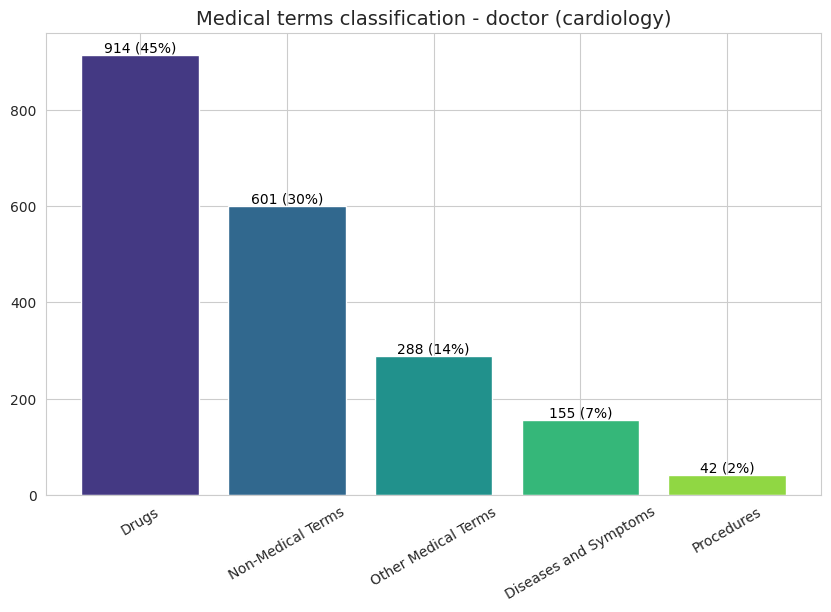

In [63]:
bgraff_entity_class = get_doctors_classification(bgraff_path,1)
bgraff_entity_class = bgraff_entity_class.replace('wskaźnik postępu', 'Non-Medical Terms')

bgraff_classification_all = Counter(bgraff_entity_class[bgraff_entity_class.columns[1]])

create_bar_chart(bgraff_classification_all, 'Medical terms classification - doctor (cardiology)')

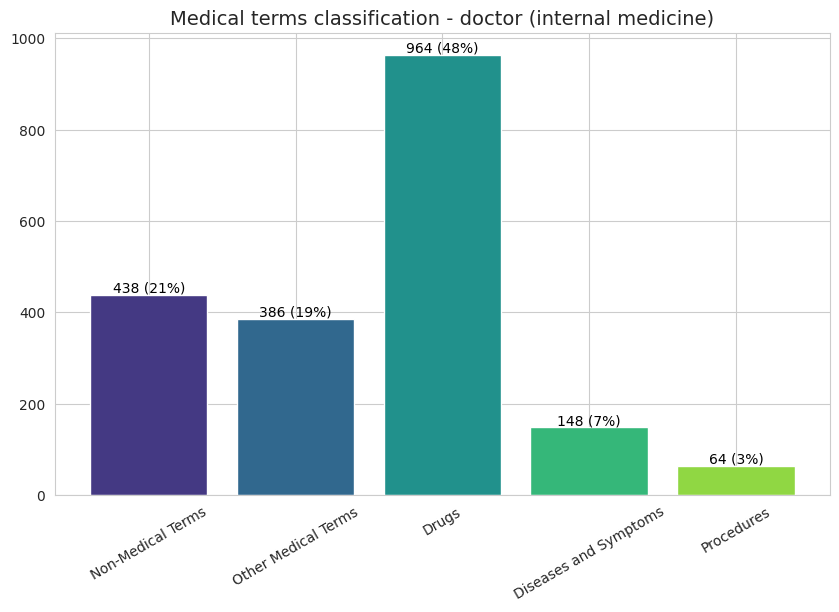

In [64]:
aszyndler_entity_class = get_doctors_classification(aszyndler_path,'x')
aszyndler_classification_all = Counter(aszyndler_entity_class[aszyndler_entity_class.columns[1]])
create_bar_chart(aszyndler_classification_all, 'Medical terms classification - doctor (internal medicine)')

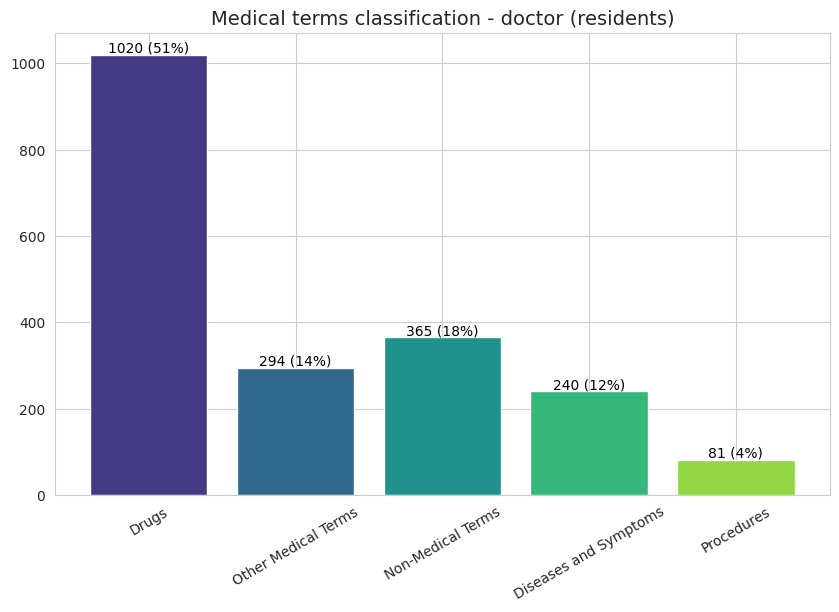

In [65]:
rezydenci_entity_class = get_doctors_classification(rezydenci_path,'X',1)
rezydenci_classification_all = Counter(rezydenci_entity_class[rezydenci_entity_class.columns[1]])
create_bar_chart(rezydenci_classification_all, 'Medical terms classification - doctor (residents)')

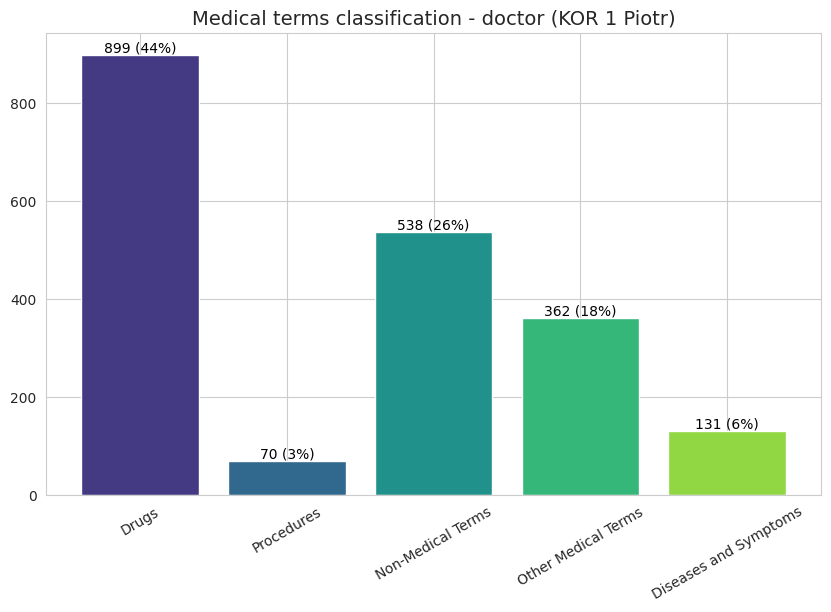

In [66]:
KOR_Piotr_entity_class = get_doctors_classification(KOR_Piotr_path,'x',1)
KOR_Piotr_classification_all = Counter(KOR_Piotr_entity_class[KOR_Piotr_entity_class.columns[1]])
create_bar_chart(KOR_Piotr_classification_all, 'Medical terms classification - doctor (KOR 1 Piotr)')

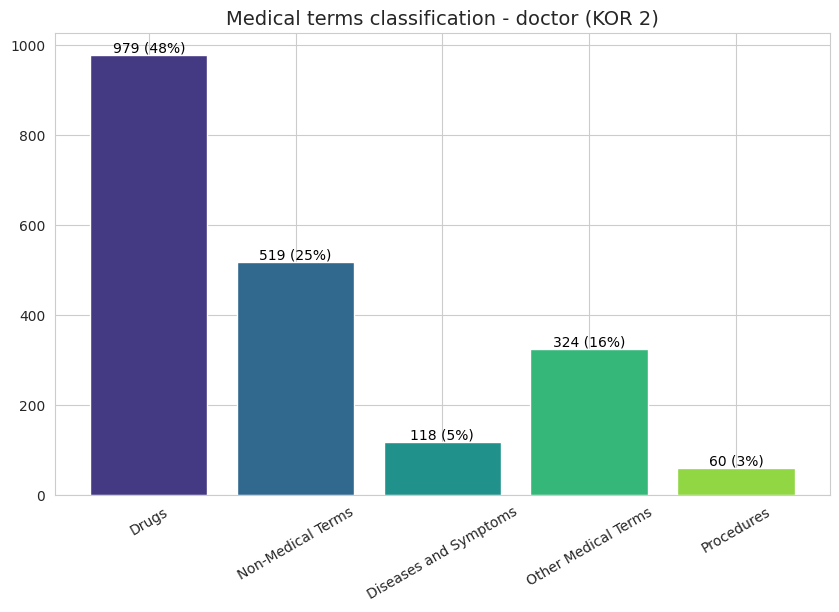

In [67]:
KOR_ratunkowa_entity_class = get_doctors_classification(KOR_ratunkowa_path,'x',1)
KOR_ratunkowa_classification_all = Counter(KOR_ratunkowa_entity_class[KOR_ratunkowa_entity_class.columns[1]])
create_bar_chart(KOR_ratunkowa_classification_all, 'Medical terms classification - doctor (KOR 2)')

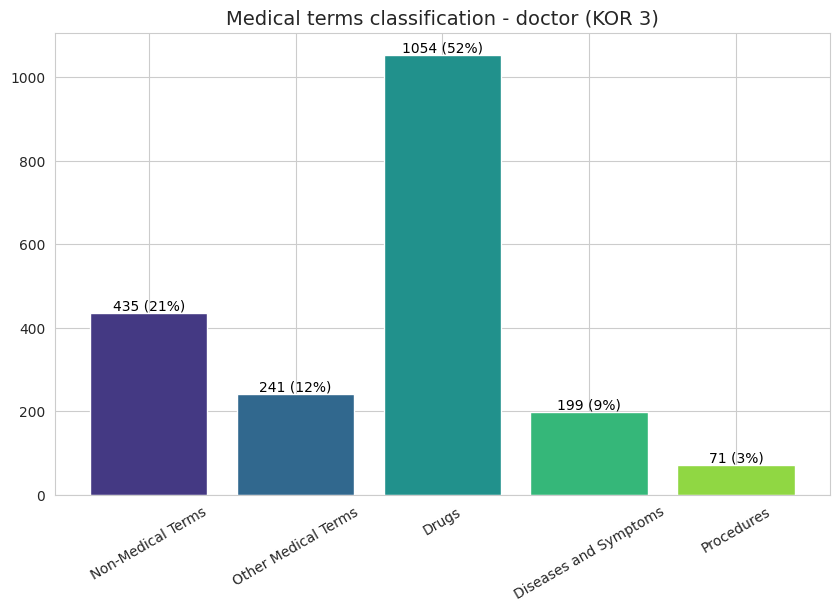

In [68]:
KOR_Tableki_admed_entity_class = get_doctors_classification(KOR_Tableki_admed_path,'x',1)
KOR_Tableki_admed_classification_all = Counter(KOR_Tableki_admed_entity_class[KOR_Tableki_admed_entity_class.columns[1]])
create_bar_chart(KOR_Tableki_admed_classification_all, 'Medical terms classification - doctor (KOR 3)')

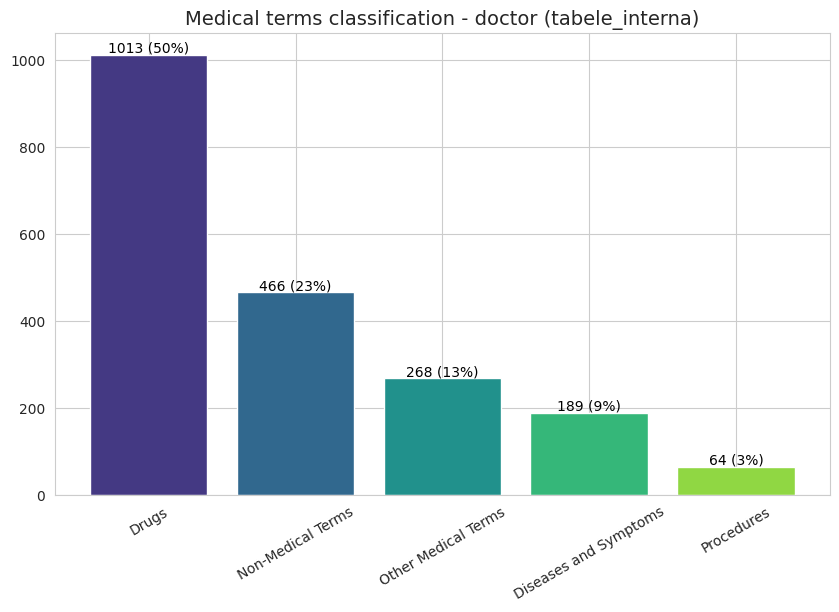

In [69]:
tabele_interna_entity_class = get_doctors_classification(tabele_interna_path,'X',1)
tabele_interna_classification_all = Counter(tabele_interna_entity_class[tabele_interna_entity_class.columns[1]])
create_bar_chart(tabele_interna_classification_all, 'Medical terms classification - doctor (tabele_interna)')

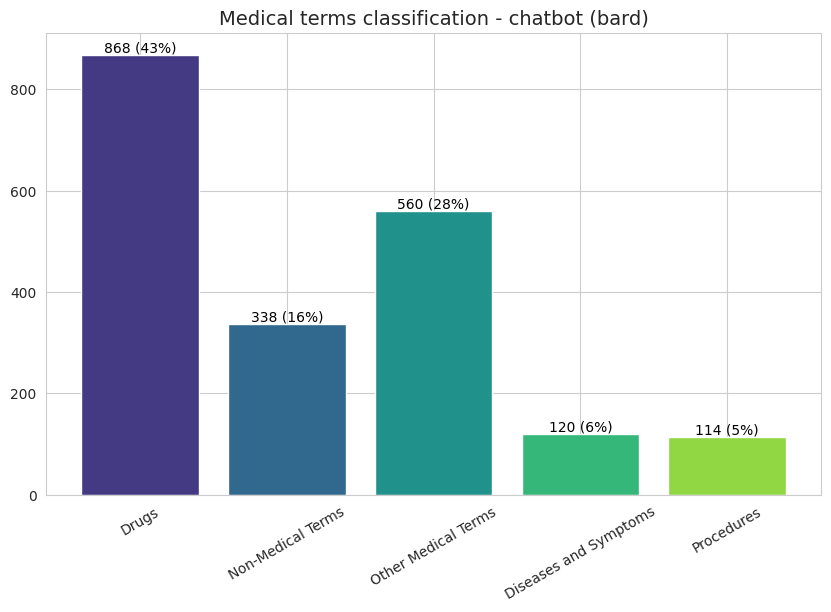

In [70]:
dict_classified_bard = get_number_of_samples_per_class('bard',2)
create_bar_chart(dict_classified_bard, 'Medical terms classification - chatbot (bard)')


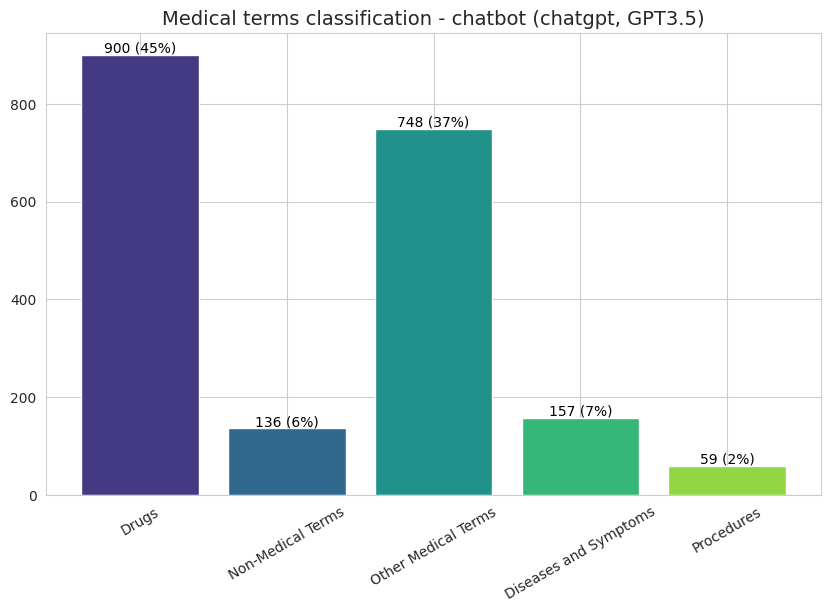

In [71]:
dict_classified_chatgpt = get_number_of_samples_per_class('chatgpt',1)
create_bar_chart(dict_classified_chatgpt, 'Medical terms classification - chatbot (chatgpt, GPT3.5)')

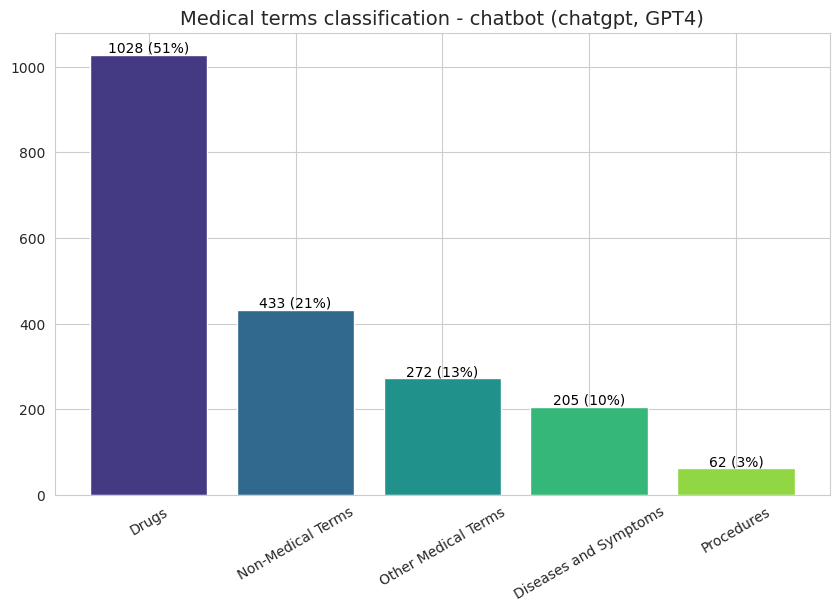

In [72]:
dict_classified_chatgpt4 = get_number_of_samples_per_class('chatgpt4',2, None)
create_bar_chart(dict_classified_chatgpt4, 'Medical terms classification - chatbot (chatgpt, GPT4)')

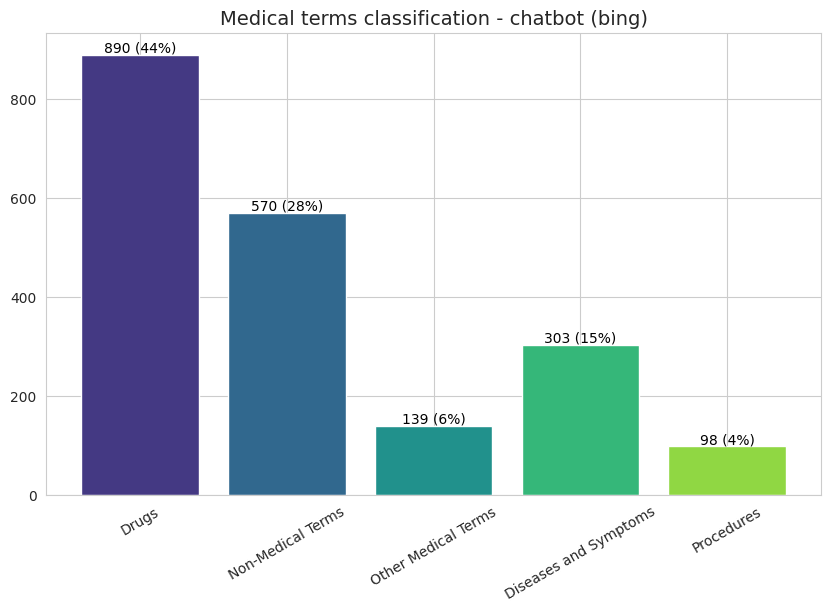

In [73]:
dict_classified_bing = get_number_of_samples_per_class('bing',2, None)
create_bar_chart(dict_classified_bing, 'Medical terms classification - chatbot (bing)')

In [74]:
print(bgraff_classification_all)
print(aszyndler_classification_all)
print(rezydenci_classification_all)
print(tabele_interna_classification_all)
print(KOR_Tableki_admed_classification_all)
print(KOR_ratunkowa_classification_all)
print(KOR_Piotr_classification_all)
print(dict_classified_bard)
print(dict_classified_chatgpt)
print(dict_classified_chatgpt4)
print(dict_classified_bing)

Counter({'Drugs': 914, 'Non-Medical Terms': 601, 'Other Medical Terms': 288, 'Diseases and Symptoms': 155, 'Procedures': 42})
Counter({'Drugs': 964, 'Non-Medical Terms': 438, 'Other Medical Terms': 386, 'Diseases and Symptoms': 148, 'Procedures': 64})
Counter({'Drugs': 1020, 'Non-Medical Terms': 365, 'Other Medical Terms': 294, 'Diseases and Symptoms': 240, 'Procedures': 81})
Counter({'Drugs': 1013, 'Non-Medical Terms': 466, 'Other Medical Terms': 268, 'Diseases and Symptoms': 189, 'Procedures': 64})
Counter({'Drugs': 1054, 'Non-Medical Terms': 435, 'Other Medical Terms': 241, 'Diseases and Symptoms': 199, 'Procedures': 71})
Counter({'Drugs': 979, 'Non-Medical Terms': 519, 'Other Medical Terms': 324, 'Diseases and Symptoms': 118, 'Procedures': 60})
Counter({'Drugs': 899, 'Non-Medical Terms': 538, 'Other Medical Terms': 362, 'Diseases and Symptoms': 131, 'Procedures': 70})
{'Drugs': 868, 'Non-Medical Terms': 338, 'Other Medical Terms': 560, 'Diseases and Symptoms': 120, 'Procedures': 11

In [75]:
aszyndler_sorted = aszyndler_entity_class.sort_values(by='entity')
bgraff_sorted = bgraff_entity_class.sort_values(by='entity')
rezydenci_sorted = rezydenci_entity_class.sort_values(by='entity')


In [76]:
aszyndler_sorted.to_excel(home_path + 'aszyndler_sorted.xlsx')
bgraff_sorted.to_excel(home_path + 'bgraff_sorted.xlsx')
rezydenci_sorted.to_excel(home_path + 'rezydenci_sorted.xlsx')